In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.dropna(inplace=True)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_test

,Age,Fare
149,42.0,13.0000
407,3.0,18.7500
53,29.0,26.0000
369,24.0,69.3000
818,43.0,6.4500
...,...,...
819,10.0,27.9000
164,1.0,39.6875
363,35.0,7.0500
56,21.0,10.5000


# Without Binning

In [8]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

print("Accuracy Score by DTC:",accuracy_score(y_test,y_pred))

Accuracy Score by DTC: 0.6083916083916084


#### cross val score

In [9]:
print("Cross Val Score by DTC:",np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=10)))

Cross Val Score by DTC: 0.6288732394366197


# After Binning

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

In [11]:
k_bean_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
k_bean_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [12]:
trf = ColumnTransformer(transformers=[
    ('age',k_bean_age,[0]),
    ('fare',k_bean_fare,[1]),
],remainder='passthrough')

In [13]:
X_train_transformed =  trf.fit_transform(X_train)
X_test_transformed =  trf.transform(X_test)

In [14]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_transformed,y_train)

y_pred_trans = dtc.predict(X_test_transformed)

print("Accuracy Score by DTC After transformed:",accuracy_score(y_test,y_pred_trans))

Accuracy Score by DTC After transformed: 0.6223776223776224


#### cross val score

In [15]:
X_transformed = trf.fit_transform(X)
print("Cross val Score by DTC After transformed:",np.mean(cross_val_score(DecisionTreeClassifier(),X_transformed,y,scoring='accuracy',cv=10)))

Cross val Score by DTC After transformed: 0.682140062597809


In [16]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6274843505477308


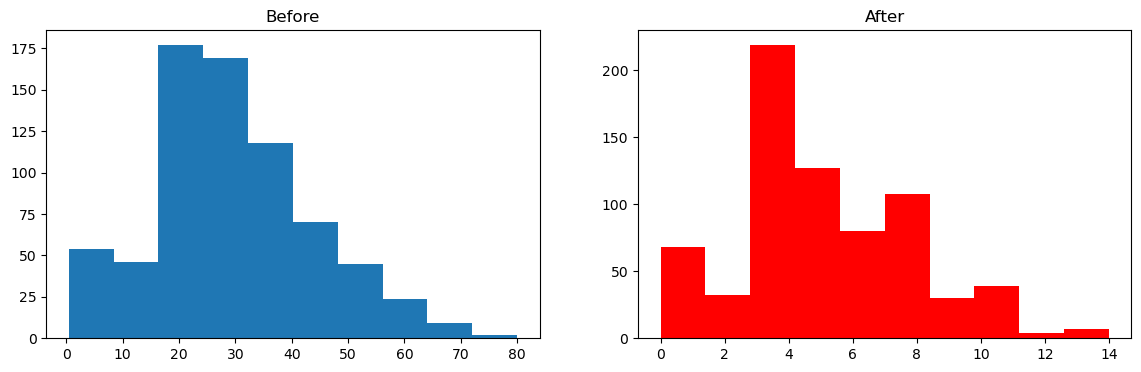

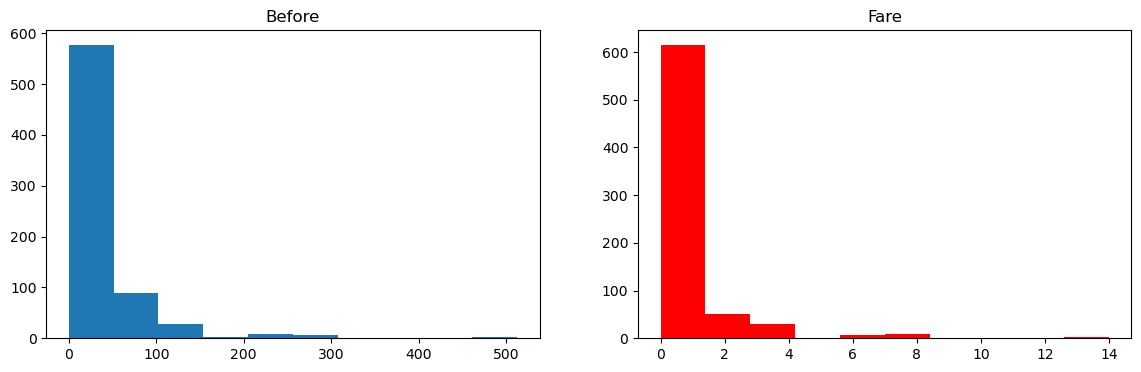

In [17]:
discretize(15,'uniform')

0.6274647887323943


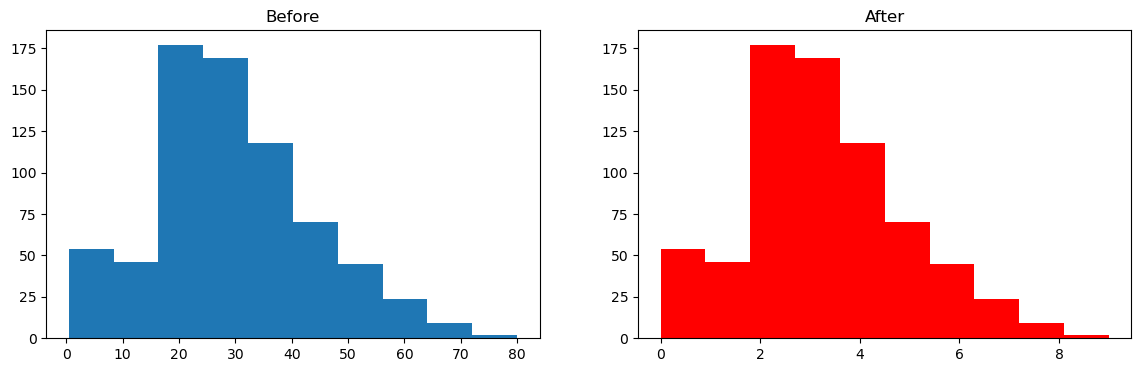

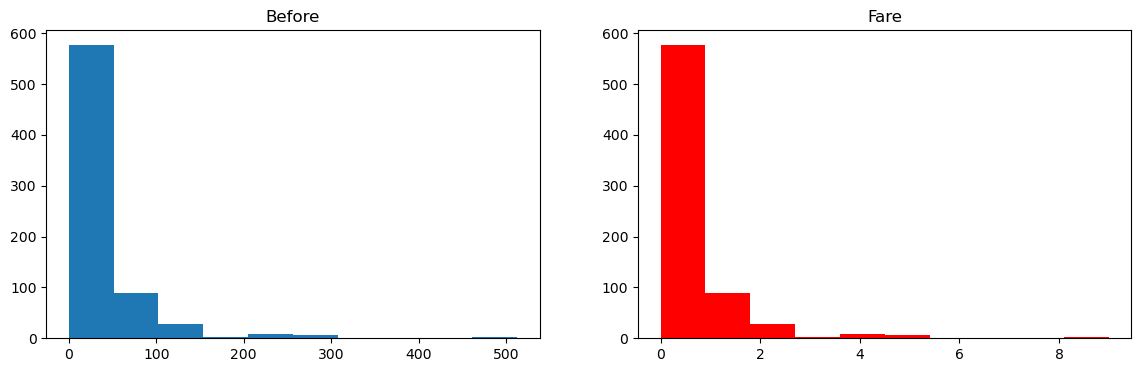

In [18]:
discretize(10,'uniform')

0.6288928012519561


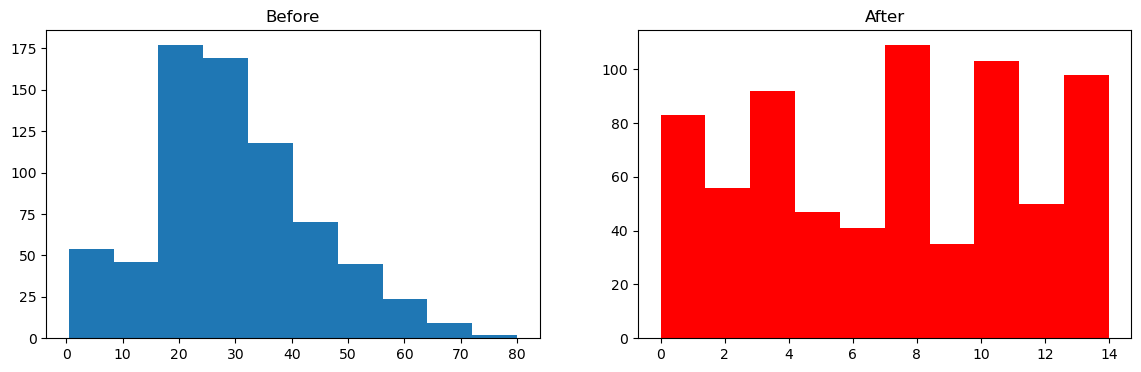

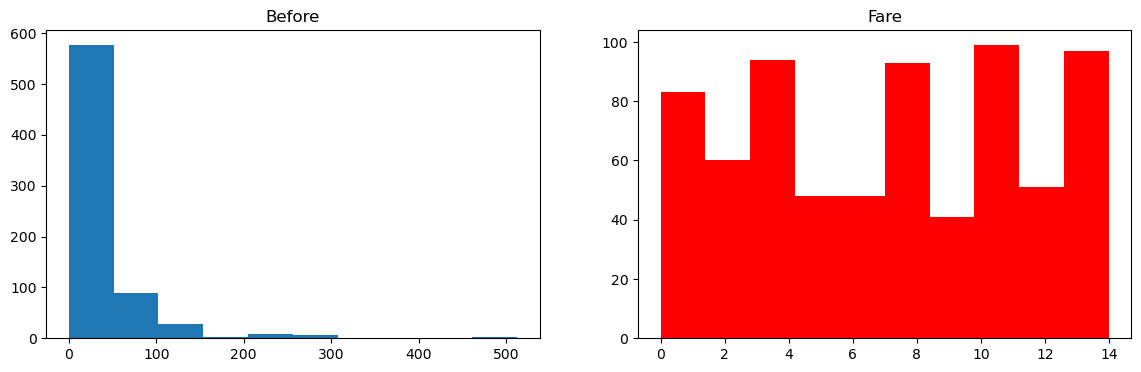

In [19]:
discretize(15,'quantile')

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6331377151799688


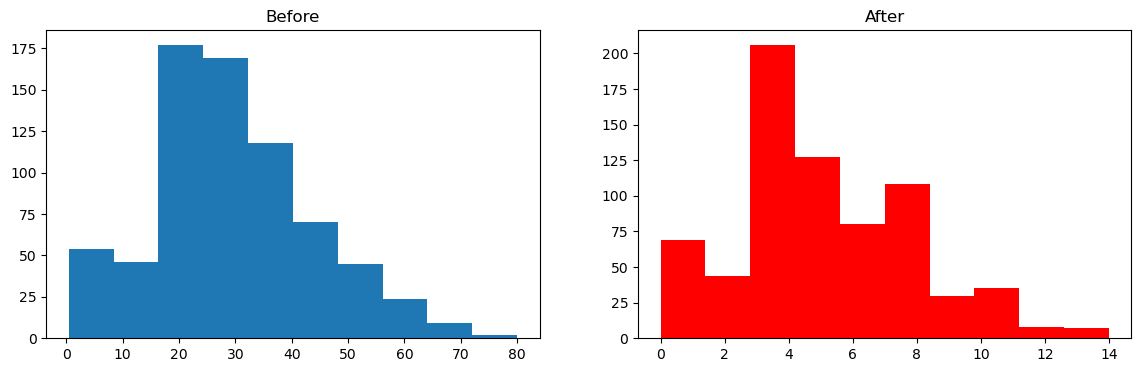

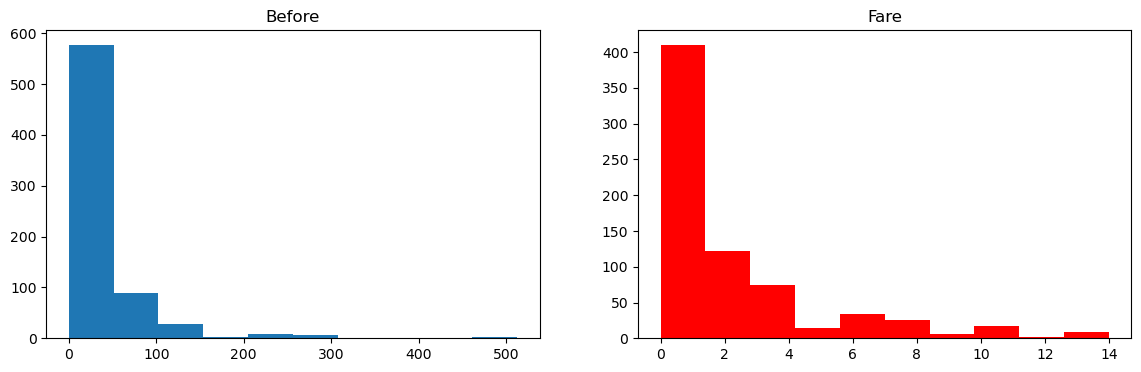

In [20]:
discretize(15,'kmeans')